In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
print(random.randint(1,6))

2


To compare between player A and B using different strategies, just copy-paste the code under #Strategy '?' for Player '?'

For strategy 1: Random play

49950
49803
247
49719
50051
230
50005
49763
232
49815
49950
235
49705
50054
241
49952
49813
235
49869
49889
242
50025
49749
226
49943
49826
231
49921
49840
239
[0.4945975935834669, 0.5015757626372164]
[0.4959319630990846, 0.5030897395699323]


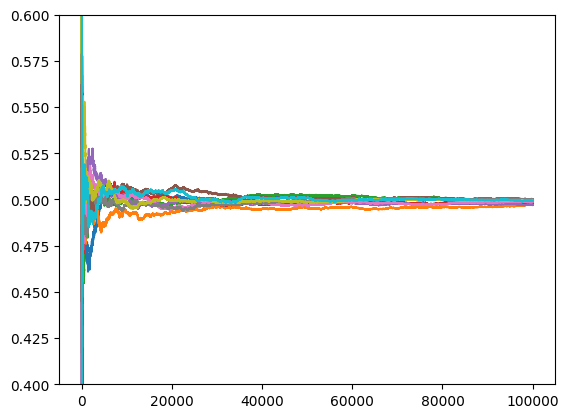

In [ ]:
# run simulation 10 x 10^6
winning_a = [0] * 10
winning_b = [0] * 10
for time in range(10):
  game_num = 100000
  round = 3
  wintime_a = 0
  wintime_b = 0
  tie = 0
  goal = 25

  prob_a = [0] * 100000
  prob_b = [0] * 100000
  for i in range(1, game_num + 1):
    score_a = 0
    turns_a = 0
    score_b = 0
    turns_b = 0

   #strategy 1 for player A
    for j in range(round):
      dicenum_a = random.randint(0,5)
      turns_a += dicenum_a
      for k in range(dicenum_a):
        if dicenum_a % 2 != 0:
          score_a += random.randint(1,6)
        else:
          score_a -= random.randint(1,6)

   #strategy 1 for player B
    for j in range(round):
      dicenum_b = random.randint(0,5)
      turns_b += dicenum_b
      for k in range(dicenum_b):
        if dicenum_b % 2 != 0:
          score_b += random.randint(1,6)
        else:
          score_b -= random.randint(1,6)


    b_closer = abs(score_b - goal)
    a_closer = abs(score_a - goal)

    if a_closer > b_closer:
      wintime_b += 1
    elif b_closer > a_closer:
      wintime_a += 1

    else:
      if turns_a > turns_b:
        wintime_b += 1
      elif turns_a < turns_b:
        wintime_a += 1
      else:
        tie += 1


    prob_a[i-1] = wintime_a / i
    prob_b[i-1] = wintime_b / i


  winning_a[time] = sum(prob_a) / game_num
  winning_b[time] = sum(prob_b) / game_num
  print(wintime_a)
  print(wintime_b)
  print(tie)
  # plot the convergence graph for player a and b
  plt.plot(prob_a)
  plt.ylim([0.4,0.6])

print([min(winning_a), max(winning_a)])
print([min(winning_b), max(winning_b)])


(array([ 23.,  46.,  93., 165., 231., 207., 136.,  72.,  21.,   6.]),
 array([0.44000308, 0.45256414, 0.46512519, 0.47768625, 0.4902473 ,
        0.50280836, 0.51536941, 0.52793047, 0.54049152, 0.55305258,
        0.56561363]),
 <BarContainer object of 10 artists>)

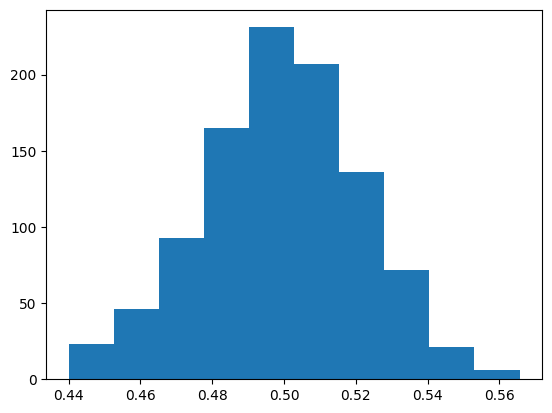

In [ ]:
# plot histogram
#with 1000 runs x 1000 simulated games

winning_a = [0] * 1000
winning_b = [0] * 1000
for time in range(1000):
  game_num = 1000
  round = 3
  wintime_a = 0
  wintime_b = 0
  tie = 0
  goal = 25

  prob_a = [0] * 1000
  prob_b = [0] * 1000
  for i in range(1, game_num + 1):
    score_a = 0
    turns_a = 0
    score_b = 0
    turns_b = 0

    for j in range(round):
      dicenum_a = random.randint(0,5)
      turns_a += dicenum_a
      for k in range(dicenum_a):
        if dicenum_a % 2 != 0:
          score_a += random.randint(1,6)
        else:
          score_a -= random.randint(1,6)

    for j in range(round):
      dicenum_b = random.randint(0,5)
      turns_b += dicenum_b
      for k in range(dicenum_b):
        if dicenum_b % 2 != 0:
          score_b += random.randint(1,6)
        else:
          score_b -= random.randint(1,6)


    b_closer = abs(score_b - goal)
    a_closer = abs(score_a - goal)

    if a_closer > b_closer:
      wintime_b += 1
    elif b_closer > a_closer:
      wintime_a += 1

    else:
      if turns_a > turns_b:
        wintime_b += 1
      elif turns_a < turns_b:
        wintime_a += 1
      else:
        tie += 1


    prob_a[i-1] = wintime_a / i
    prob_b[i-1] = wintime_b / i

  winning_a[time] = sum(prob_a) / game_num
  winning_b[time] = sum(prob_b) / game_num
  # plot the histogram

plt.hist(winning_a)

Strategy 2: random play but add threshold for the choice of stopping rolling

In [ ]:

winning_a = [0] * 10
winning_b = [0] * 10
for time in range(10):
  game_num = 100000
  round = 3
  wintime_a = 0
  wintime_b = 0
  tie = 0
  goal = 25

  prob_a = [0] * 100000
  prob_b = [0] * 100000
  for i in range(1, game_num + 1):
    score_a = 0
    turns_a = 0
    score_b = 0
    turns_b = 0

   #strategy 2 for player A, stop before c = 5
    for j in range(round):
      dicenum_a = random.randint(0,5)
      turns_a += dicenum_a
      for k in range(dicenum_a):
        if dicenum_a % 2 != 0:
          score_a += random.randint(1,6)
        else:
          score_a -= random.randint(1,6)
      if abs(score_a - goal) <= 10: # change 5 for trying different c
        break

   #strategy 2 for player B, stop before c = 10
    for j in range(round):
      dicenum_b = random.randint(0,5)
      turns_b += dicenum_b
      for k in range(dicenum_b):
        if dicenum_b % 2 != 0:
          score_b += random.randint(1,6)
        else:
          score_b -= random.randint(1,6)
      if abs(score_b - goal) <= 5: # change 10 for trying different c
        break


    b_closer = abs(score_b - goal)
    a_closer = abs(score_a - goal)

    if a_closer > b_closer:
      wintime_b += 1
    elif b_closer > a_closer:
      wintime_a += 1

    else:
      if turns_a > turns_b:
        wintime_b += 1
      elif turns_a < turns_b:
        wintime_a += 1
      else:
        tie += 1

    prob_a[i-1] = wintime_a / i
    prob_b[i-1] = wintime_b / i

  winning_a[time] = sum(prob_a) / game_num
  winning_b[time] = sum(prob_b) / game_num
  plt.plot(prob_a)
  plt.ylim([0.3,0.7])

print(winning_a)
print(winning_b)
print([min(winning_a), max(winning_a)])
print([min(winning_b), max(winning_b)])


Strategy3: consider current score difference with goal: >0 or <0 to choose number of dices

[0.4967266213444762, 0.4953174629435087, 0.4892525340886083, 0.49577521902913496, 0.4961912723156513, 0.49589569448057536, 0.4921698253413073, 0.4948720870844274, 0.49964032699698424, 0.4930804945458375]
[0.4914322235169775, 0.49313549505800974, 0.4986621272402082, 0.4934641837719504, 0.4914346642120846, 0.49115565679499695, 0.4956482229537192, 0.49372197246046307, 0.48863995925116904, 0.4943529125561395]
[0.4892525340886083, 0.49964032699698424]
[0.48863995925116904, 0.4986621272402082]


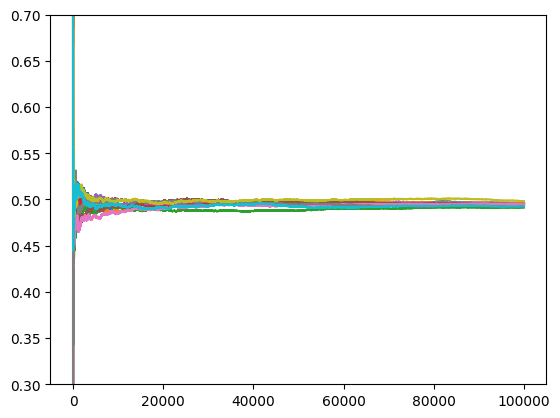

In [ ]:
winning_a = [0] * 10
winning_b = [0] * 10
for time in range(10):
  game_num = 100000
  round = 3
  wintime_a = 0 # total game wins of player a
  wintime_b = 0 # total game wins of player b
  tie = 0
  goal = 25

  prob_a = [0] * 100000
  prob_b = [0] * 100000
  for i in range(1, game_num + 1):
    score_a = 0
    turns_a = 0
    score_b = 0
    turns_b = 0

  #strategy 3 for player A
    for j in range(round):
      D_a= goal - score_a
      if D_a > 0:
        dicenum_a = random.randrange(1,6,2)
        turns_a += dicenum_a
        for k in range(dicenum_a):
          score_a += random.randint(1,6)

      elif D_a < 0:
        dicenum_a = random.randrange(2,5,2)
        turns_a += dicenum_a
        for k in range(dicenum_a):
          score_a -= random.randint(1,6)

      else:
        break

    #strategy 3 for player B
    for j in range(round):
      D_b= goal - score_b
      if D_b > 0:
        dicenum_b = random.randrange(1,6,2)
        turns_b += dicenum_b
        for k in range(dicenum_b):
          score_b += random.randint(1,6)

      elif D_b < 0:
        dicenum_b = random.randrange(2,5,2)
        turns_b += dicenum_b
        for k in range(dicenum_b):
          score_b -= random.randint(1,6)

      else:
        break


    b_closer = abs(score_b - goal)
    a_closer = abs(score_a - goal)

    if a_closer > b_closer:
      wintime_b += 1
    elif b_closer > a_closer:
      wintime_a += 1

    else:
      if turns_a > turns_b:
        wintime_b += 1
      elif turns_a < turns_b:
        wintime_a += 1
      else:
        tie += 1


    prob_a[i-1] = wintime_a / i
    prob_b[i-1] = wintime_b / i


  winning_a[time] = sum(prob_a) / game_num
  winning_b[time] = sum(prob_b) / game_num

  plt.plot(prob_a)
  plt.ylim([0.3,0.7])

print(winning_a)
print(winning_b)
print([min(winning_a), max(winning_a)])
print([min(winning_b), max(winning_b)])

Strategy 4: consider current score along with expected value - pick exact number of dices

[0.48013756476626984, 0.4866963126003808, 0.4835791942612652, 0.48610286252447543, 0.4881859228617147, 0.48528396037575805, 0.487123621055193, 0.4869290490071403, 0.48400528301333723, 0.4815119739412851]
[0.48969220050188145, 0.4819030705087117, 0.4843416720190826, 0.4822172206966055, 0.4802859684745319, 0.4835583620631952, 0.4826339355343887, 0.48102144307011346, 0.48486846531615435, 0.4867819466367449]
[0.48013756476626984, 0.4881859228617147]
[0.4802859684745319, 0.48969220050188145]


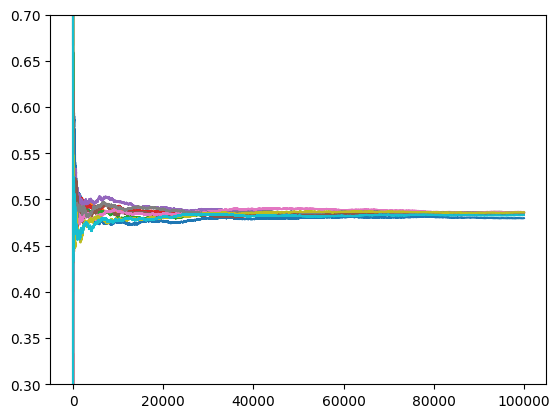

In [ ]:
#Set expected number of n dices
E1 = 3.5
E2 = 7
E3 = 10.5
E4 = 14
E5 = 17.5
E6 = 21


# run the whole simulation 10 times
winning_a = [0] * 10
winning_b = [0] * 10
for time in range(10):
  game_num = 100000
  round = 3
  wintime_a = 0
  wintime_b = 0
  tie = 0
  goal = 25

  prob_a = [0] * 100000
  prob_b = [0] * 100000
  for i in range(1, game_num + 1):
    score_a = 0
    turns_a = 0
    score_b = 0
    turns_b = 0

#Strategy 4 for player A

    for j in range(round):
      D_a = goal - score_a
      if D_a > 0:
        dicenum_a = 0
        if abs(D_a - E1) == abs(D_a - E3):
          dicenum_a = random.randrange(1,4,2)
        elif abs(D_a - E3) == abs(D_a - E5):
          dicenum_a = random.randrange(3,6,2)

        else:
          min_diff = min(abs(D_a - E1), abs(D_a - E3), abs(D_a - E5))
          if min_diff == abs(D_a - E1):
            dicenum_a  = 1
          elif min_diff == abs(D_a - E3):
            dicenum_a = 3
          else:
            dicenum_a = 5
        for k in range(dicenum_a):
          score_a += random.randint(1,6)
        turns_a += dicenum_a

      elif D_a < 0:
        dicenum_a = 0
        min_diff = min(abs(D_a + E2), abs(D_a + E4))
        if min_diff == abs(D_a + E4):
          dicenum_a = 2
        else:
          dicenum_a = 4
        turns_a += dicenum_a
        for k in range(dicenum_a):
          score_a -= random.randint(1,6)
      else:
        break

  #Strategy 4 for player B
    for j in range(round):
      D_b = goal - score_b
      if D_b > 0:
        dicenum_b = 0
        if abs(D_b - E1) == abs(D_b - E3):
          dicenum_b = random.randrange(1,4,2)
        elif abs(D_b - E3) == abs(D_b - E5):
          dicenum_b = random.randrange(3,6,2)

        else:
          min_diff = min(abs(D_b - E1), abs(D_b - E3), abs(D_b - E5))
          if min_diff == abs(D_b - E1):
            dicenum_b  = 1
          elif min_diff == abs(D_b - E3):
            dicenum_b = 3
          else:
            dicenum_b = 5

        for k in range(dicenum_b):
          score_b += random.randint(1,6)
        turns_b += dicenum_b

      elif D_b < 0:
        dicenum_b = 0
        min_diff = min(abs(D_b + E2), abs(D_b + E4))
        if min_diff == abs(D_b + E4):
          dicenum_b = 2
        else:
          dicenum_b = 4
        turns_b += dicenum_b
        for k in range(dicenum_b):
          score_b -= random.randint(1,6)
      else:
        break


    b_closer = abs(score_b - goal)
    a_closer = abs(score_a - goal)

    if a_closer > b_closer:
      wintime_b += 1
    elif b_closer > a_closer:
      wintime_a += 1

    else:
      if turns_a > turns_b:
        wintime_b += 1
      elif turns_a < turns_b:
        wintime_a += 1
      else:
        tie += 1

    prob_a[i-1] = wintime_a / i
    prob_b[i-1] = wintime_b / i

  winning_a[time] = sum(prob_a) / game_num
  winning_b[time] = sum(prob_b) / game_num

  plt.plot(prob_a)
  plt.ylim([0.3,0.7])

print(winning_a)
print(winning_b)
print([min(winning_a), max(winning_a)])
print([min(winning_b), max(winning_b)])



Strategy 5: select dice number based on distance with expected value, but stop when having 2 steps close to distance

[0.4764860032227332, 0.4691793385657455, 0.4692630223185226, 0.46947657171835827, 0.4739403669330875, 0.4728710624877468, 0.4702584205064979, 0.4702894957832811, 0.46796982423722044, 0.47450103422899564]
[0.46740561185210594, 0.4719867054113147, 0.472444880950822, 0.4727520831677756, 0.4676030673993163, 0.47081175212965454, 0.47188168293257615, 0.4713901655168629, 0.47390011424855233, 0.46992244775261477]
[0.46796982423722044, 0.4764860032227332]
[0.46740561185210594, 0.47390011424855233]


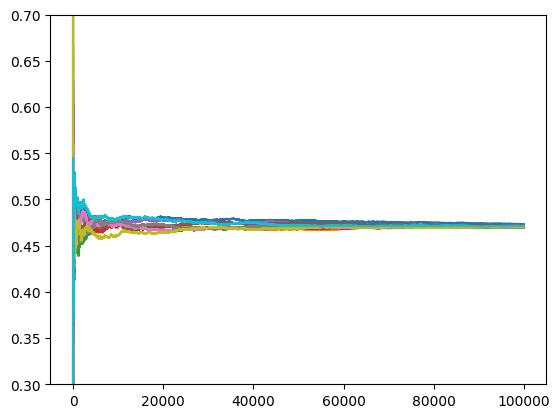

In [ ]:
#Set expected number of n dices
E1 = 3.5
E2 = 7
E3 = 10.5
E4 = 14
E5 = 17.5
E6 = 21


# run the whole simulation 10 times
winning_a = [0] * 10
winning_b = [0] * 10
for time in range(10):
  game_num = 100000
  round = 3
  wintime_a = 0
  wintime_b = 0
  tie = 0
  goal = 25

  prob_a = [0] * 100000
  prob_b = [0] * 100000
  for i in range(1, game_num + 1):
    score_a = 0
    turns_a = 0
    score_b = 0
    turns_b = 0

#Strategy 5 for player A

    for j in range(round):
      D_a = goal - score_a
      if abs(D_a) <= 5:
        break
      elif D_a > 0:
        dicenum_a = 0
        if abs(D_a - E1) == abs(D_a - E3):
          dicenum_a = random.randrange(1,4,2)
        elif abs(D_a - E3) == abs(D_a - E5):
          dicenum_a = random.randrange(3,6,2)

        else:
          min_diff = min(abs(D_a - E1), abs(D_a - E3), abs(D_a - E5))
          if min_diff == abs(D_a - E1):
            dicenum_a  = 1
          elif min_diff == abs(D_a - E3):
            dicenum_a = 3
          else:
            dicenum_a = 5
        for k in range(dicenum_a):
          score_a += random.randint(1,6)
        turns_a += dicenum_a

      elif D_a < 0:
        dicenum_a = 0
        min_diff = min(abs(D_a + E2), abs(D_a + E4))
        if min_diff == abs(D_a + E4):
          dicenum_a = 2
        else:
          dicenum_a = 4
        turns_a += dicenum_a
        for k in range(dicenum_a):
          score_a -= random.randint(1,6)
      else:
        break

  #Strategy 5 for player B
    for j in range(round):
      D_b = goal - score_b
      if abs(D_b) <= 5:
          break
      elif D_b > 0:
        dicenum_b = 0
        if abs(D_b - E1) == abs(D_b - E3):
          dicenum_b = random.randrange(1,4,2)
        elif abs(D_b - E3) == abs(D_b - E5):
          dicenum_b = random.randrange(3,6,2)

        else:
          min_diff = min(abs(D_b - E1), abs(D_b - E3), abs(D_b - E5))
          if min_diff == abs(D_b - E1):
            dicenum_b  = 1
          elif min_diff == abs(D_b - E3):
            dicenum_b = 3
          else:
            dicenum_b = 5

        for k in range(dicenum_b):
          score_b += random.randint(1,6)
        turns_b += dicenum_b

      elif D_b < 0:
        dicenum_b = 0
        min_diff = min(abs(D_b + E2), abs(D_b + E4))
        if min_diff == abs(D_b + E4):
          dicenum_b = 2
        else:
          dicenum_b = 4
        turns_b += dicenum_b
        for k in range(dicenum_b):
          score_b -= random.randint(1,6)
      else:
        break


    b_closer = abs(score_b - goal)
    a_closer = abs(score_a - goal)

    if a_closer > b_closer:
      wintime_b += 1
    elif b_closer > a_closer:
      wintime_a += 1

    else:
      if turns_a > turns_b:
        wintime_b += 1
      elif turns_a < turns_b:
        wintime_a += 1
      else:
        tie += 1

    prob_a[i-1] = wintime_a / i
    prob_b[i-1] = wintime_b / i

  winning_a[time] = sum(prob_a) / game_num
  winning_b[time] = sum(prob_b) / game_num

  plt.plot(prob_a)
  plt.ylim([0.3,0.7])

print(winning_a)
print(winning_b)
print([min(winning_a), max(winning_a)])
print([min(winning_b), max(winning_b)])

